# 显示进度条(参考用)

In [1]:
import sys,time
def progress_bar(i):
    '''持续调用此函数，并传入i，就可以显示基于i的进度的进度条'''
    print("\r", end="")  # 输出位置回到行首

    # 显示进度百分比，并同时显示进度1/2(可以自己调节)个数的进度条符号：▋
    print("处理进度: {}%: ".format(i), "▋" * (i // 2), end="")
    
    # 有的时候大循环中printout不会马上运行，而是等代码运行结束后再依次运行
    # 这样有可能让我们的进度条显示异常，所以
    # 用flush强制输出,确保以上print语句运行
    sys.stdout.flush()  
    
    time.sleep(0.05) # 程序暂停0.05秒


for i in range(0, 101):
    progress_bar(i)

处理进度: 100%:  ▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋

# 载入数据集&显示数字(参考用)

(1797, 8, 8)


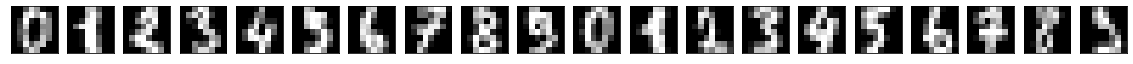

In [47]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits(n_class=10) # 把十个类（0~9）的数字全部载入
print((digits.images).shape) #一共1797层，8*8 的image

# 显示前20个数字
fg, ax=plt.subplots(1,20,figsize=(20,3))
for i in range(20):
    ax[i].imshow(digits.images[i],cmap='gray')
    ax[i].set(xticks=[], yticks=[])

# 显示数据集数字(参考用)

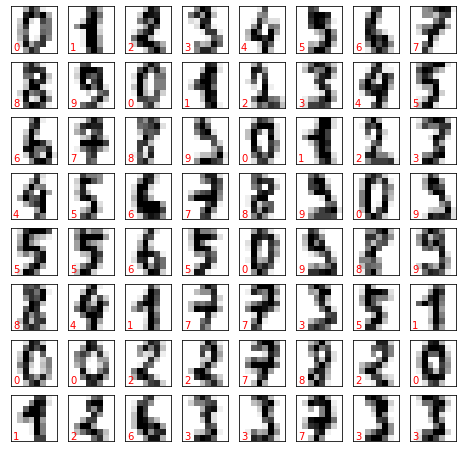

In [3]:
fig, ax=plt.subplots(8, 8, figsize=(8, 8)) # 构建一个 8*8 的子图矩阵

for i, axi in enumerate(ax.ravel()): # 循环每一个子图位置，并在该位置上显示一张数字图像
    axi.imshow(digits.images[i], cmap='binary') # 显示数字图像
    axi.set(xticks=[], yticks=[])
    
    # 把图像所代表的数字显示在图像的左下角，即坐标为(0.05, 0.05)的位置
    # transform=axi.transAxes把控制显示位置的坐标系变为左下角(0,0)右上角(1,1)的模式
    # - 如果不指定transform参数，则坐标体系与图像本身一致
    axi.text(0.05, 0.05, str(digits.target[i]), transform=axi.transAxes, color='red')

# 用KNN识别数字(最佳k)(作业)

計算最優解K值: 100%:  ▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋
當K=7的時候此KNN模型準確率最高，為:0.9833333333333333, 用時:0.82s


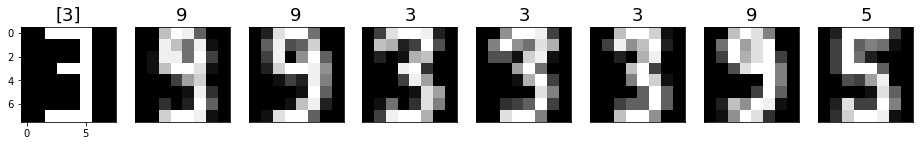

In [74]:
import sys,time
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

#去警告
warnings.filterwarnings("ignore")

# 制作一个3的图像
d = np.array(
    [[0,0,255,255,255,255,0,0],
    [0,0,  0,  0,  0,255,0,0],
    [0,0,  0,  0,  0,255,0,0],
    [0,0,  0,255,255,255,0,0],
    [0,0,  0,  0,  0,255,0,0],
    [0,0,  0,  0,  0,255,0,0],
    [0,0,  0,  0,  0,255,0,0],
    [0,0,255,255,255,255,0,0]]
)

#重整成与测试集同等规格
d =d.reshape(1,64)

#进度条函数
def progress_bar(Index,Value,times):
    for i in range(0, 101):
        '''持续调用此函数，并传入i，就可以显示基于i的进度的进度条'''
        print("\r", end="")  # 输出位置回到行首

        # 显示进度百分比，并同时显示进度1/2(可以自己调节)个数的进度条符号：▋
        print("計算最優解K值: {}%: ".format(i), "▋" * (i // 2), end="")
    
        # 有的时候大循环中printout不会马上运行，而是等代码运行结束后再依次运行
        # 这样有可能让我们的进度条显示异常，所以
        # 用flush强制输出,确保以上print语句运行
        sys.stdout.flush()  
    
        time.sleep(0.05) # 程序暂停0.05秒
    print()
    print(f'當K={Index}的時候此KNN模型準確率最高，為:{Value}, 用時:{times}s')
    
# 1. 获取X和y
df = load_digits(as_frame=True).frame
X = df.drop('target',axis=1)
y = df['target']

# 2. train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

PredictList = [] #預測率列表

# 3. 创建KNN模型
K = np.arange(1,int(np.sqrt(X_train.shape[0])))

#計時開始
start = time.time()

for i in K:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

# 4. 获得算法的准确率
    acc=knn.score(X_test,y_test) 
    #print("当K=",K,"的时候此knn模型的准确率为",acc)
    PredictList.append(acc)

PredictList = np.array(PredictList)

#聯合K和PredictList
link = pd.Series(PredictList,index = K)
#尋找最大值及對應坐標
def MAX(link):
    for IndexValues in link.index.values:
        if link[IndexValues] == link.max():
            return IndexValues,link.max()
In,Va = MAX(link)

#k用于下方绘图数量
k = In

#計時結束
end = time.time()

#用時
times = end - start

#得出所需结果
progress_bar(In,Va,round(times,2))


#繪圖

knn = KNeighborsClassifier(n_neighbors=k.max())
knn.fit(X_train,y_train)

## 得到预测点与所有点的距离
[distance, index] = knn.kneighbors(d)

#测试时用的，现在无用
#print('位置:',index)

fg, ax=plt.subplots(1,k.max()+1,figsize=(16,4))
ax[0].imshow(d.reshape(8,8),cmap='gray')
ax[0].set_title('[3]',fontsize = 18 )
#ax[0].set(xticks=[],yticks=[])

#图像转换为8*8格式
b = np.array(X_train).reshape(X_train.shape[0],8,8)
#为方便找出对应标签
c = np.array(y_train)

for i in range(k):
    ax[i+1].imshow(b[index[0][i]],cmap='gray')
    ax[i+1].set_title(c[index[0][i]],fontsize = 18 )  #标题加上数字
    ax[i+1].set(xticks=[], yticks=[])